<a href="https://colab.research.google.com/github/arofenitra/stochastic-methods-of-AI-and-Modelling/blob/main/random_variables_and_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time

## Probability Space
It is a probability triple $(\Sigma,F,P)$, where :
- $\Sigma$ is a sample space or set of possible outcome or universe of possibilities.
- $F$ is the event space, known also as sigma-algebra. This is a collection of some subsets of $\Sigma$ which includes $∅$ and $\Sigma$, and countable union of events is an event in $F$ also.
- $P$ is a probability function which assign each event space a real numbers in $[0,1]$ such that $\forall A\in F: P(A)\in [0,1]$, $P(\Sigma)=1=1-P(∅)$ and probability of countable union of mutually exclusive event is the sum of their individual probabilities.

**Example**:
Suppose we throw a 6 sided dice such that each face has an equal probability of landing face up. We have:
$$\Sigma=\{1,2,3,4,5,6\}$$
$$ F=\{∅,\{1\},...,\{6\} ,...,\{1,...,6\} \}=∪_{A\in F}A$$
$$P:F→[0,1] : P(∅)=0, P(\{i\})=\frac{1}{6} \forall i\in \{1,...,6\} , P(\{1,...,6\})=1$$


Event:[], Probability: 0.0000
Event:[1], Probability: 0.1667
Event:[2], Probability: 0.1667
Event:[3], Probability: 0.1667
Event:[4], Probability: 0.1667
Event:[5], Probability: 0.1667
Event:[6], Probability: 0.1667
Event:sigma, Probability: 1.0000


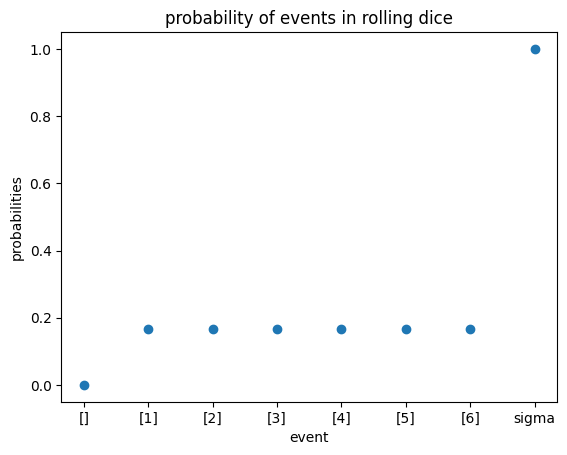

In [ ]:


#define the sample space
Sigma=np.array([1,2,3,4,5,6])

#function to roll a dice:
def roll_dice():
  return np.random.choice(Sigma)

#simulation of rolling dice n times
n_roll=10**5
results=np.array([roll_dice() for _ in range(n_roll)])

#calculate the probability based on the above results
def calculate_probability(event):
  if event==[]:
    return 0
  elif event=="sigma":
    return 1

  Sum=0
  dic_event=set()
  for x in event:
    if 1<=x and x<=6:
      dic_event.add(x)
    else:
      pass

  return len(dic_event)/6

events=[[],[1],[2],[3],[4],[5],[6],"sigma"]
probabilities=np.array([calculate_probability(event) for event in events])
for i in range(len(events)):
  print(f"Event:{events[i]}, Probability: {probabilities[i]:.4f}")
x=np.array(range(1,len(events)+1))
plt.xticks(x,events)
plt.xlabel("event")
plt.ylabel("probabilities")
plt.plot(x,probabilities,"o")
plt.title("probability of events in rolling dice")


plt.show()

## discrete and continuous Probability Distribution


### Bernouilli distribution
$$0\leq p \leq 1 \; ; \; P(X=1)=p \; ; \;P(X=0)=1-p\; ; \;$$
Cumulative density function (CDF) :
$P(X< x)=0$ if $x\leq 0$, $P(X<x)=1-p$ if $0 \leq x \leq 1$ and $P(X<x)=1$  if  $x>1$.  
$$\mathbb{E}[X]=\sum_{i=0}^1iP(X=i)=0(1-p)+1(p)=p $$
$$Var(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2=\sum_{i=0}^1i^2P(X=i)-p^2=p(1-p)$$

In [ ]:
#Bernouilli probability Density function of parameter p
def bernouilli_pdf(x,p):
  if x==0:
    return 1-p
  elif x==1:
    return p
  else:
    return 0

#Bernouilli Cumulative Distribution function of parameter p P(X<=x)
def bernouilli_cdf(x,p):
  if x <0:
    return 0
  elif x==1:
    return 1-p
  elif x>1:
    return 1

def bernouilli_mean(p):
  return p
def bernouilli_variance(p):
  return p*(1-p)



### Poisson distribution
- Parameters:  $\lambda \in (0,\infty)$(Rate), $k\in \{0,1,...\}$.
- PDF : $\displaystyle P(X=k)=\frac{\lambda^k}{k!}e^{-\lambda}$.
- CDF : $\displaystyle P(X\leq x)=e^{-\lambda}\sum_{k=0}^{\lfloor x ⌋}\frac{\lambda^k}{k!}$.   
-mean
$$\mathbb{E}[X]=\sum_{k=0}^\infty kP(X=k)=\sum_{k=0}^\infty k\frac{\lambda^k}{k!}e^{-\lambda}=e^{-\lambda}\lambda \sum_{k=0}^\infty \frac{\lambda^k}{k!}=\lambda$$
- Variance
$$Var(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2=\sum_{k=0}^\infty k^2P(X=k) -\lambda^2=\sum_{k=0}^\infty k^2\frac{\lambda^k}{k!}e^{-\lambda}-\lambda^2=e^{-\lambda}\lambda \left(\sum_{k=0}^\infty k\frac{\lambda^k}{k!}+\sum_{k=0}^\infty \frac{\lambda^k}{k!} \right)-\lambda^2=e^{-\lambda}\lambda(e^\lambda\lambda +e^\lambda)-\lambda^2=\lambda$$


<ipython-input-39-54a9e0ad2bd1>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-Lambda)*Lambda**k/np.math.factorial(k)


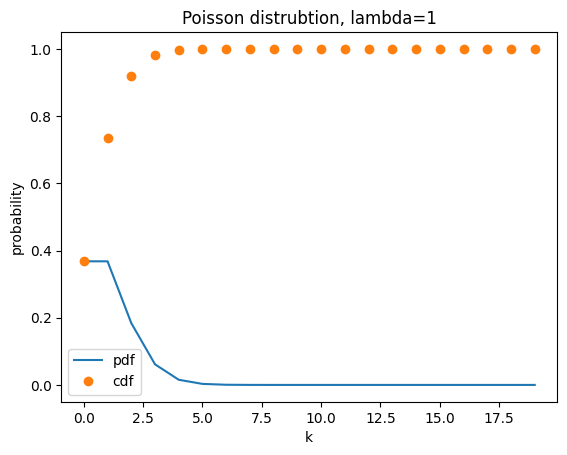

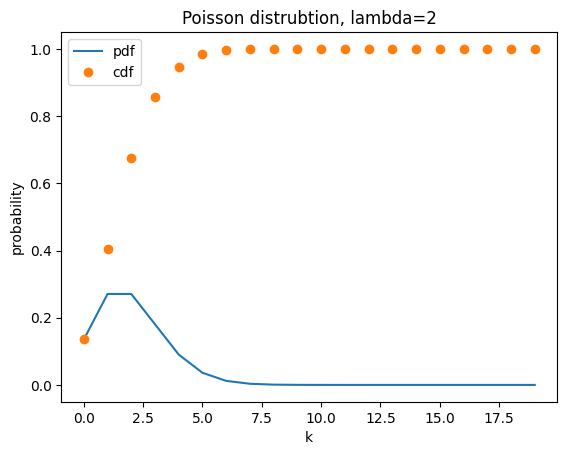

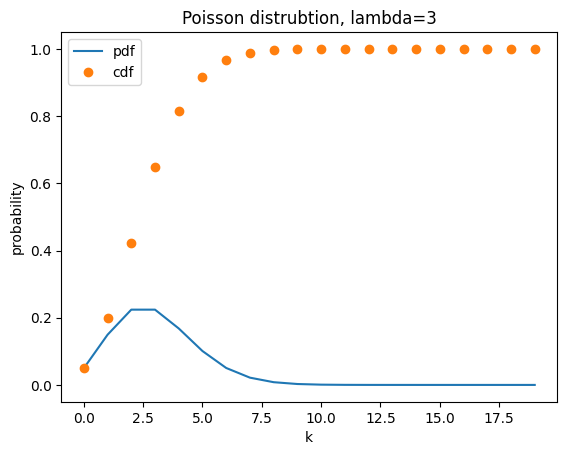

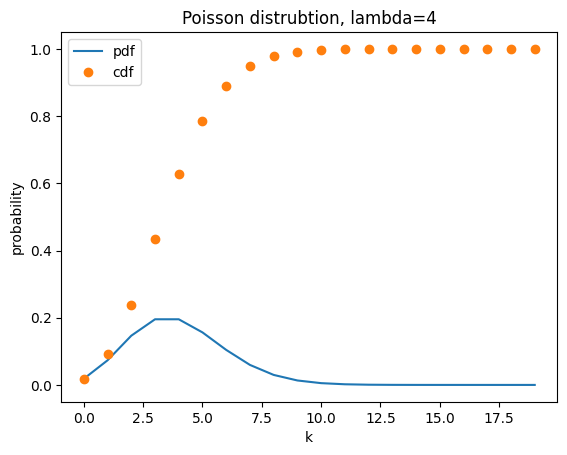

In [ ]:
def poisson_pdf(k,Lambda): #k >=0, lambda>0

  return np.exp(-Lambda)*Lambda**k/np.math.factorial(k)
def poisson_cdf(x,Lambda): #x : one value , Lambda: one value
  if x<0:
    return 0
  else: #x>=0
    summ=1
    x=int(x)
    for i in range(x,0,-1):
       summ=1+summ*Lambda/i
    summ=np.exp(-Lambda)*summ
    return summ
def poisson_cdf_Array(X,L):
  return np.array([[poisson_cdf(x,l) for x in X] for l in L])

def poisson_mean(Lambda):
  return Lambda
def poisson_variance(Lambda):
  return Lambda

#plotting of library and the above function
x=np.linspace(0,20,20,endpoint=False,dtype=np.int32)
Lambdas=np.array([1,2,3,4])
for Lambda in Lambdas:
  y1=np.array([poisson_pdf(xx,Lambda) for xx in x])
  y2=np.array([poisson_cdf(xx,Lambda) for xx in x])
  plt.plot(x,y1,label="pdf")
  plt.plot(x,y2,"o",label="cdf")
  plt.legend()
  plt.xlabel("k")
  plt.ylabel("probability")
  plt.title("Poisson distrubtion, lambda="+str(Lambda))
  plt.show()



### Gaussian distribution
- Parameters : $\mu$ (mean) and $\sigma^2 >0$ (variance) .  
- PDF: $\displaystyle P(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left( -\frac{(x-\mu)^2}{2\sigma^2}\right)}$.  
- CDF: $\displaystyle P(X\leq x|\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-∞}^x\exp{\left( -\frac{(t-\mu)^2}{2\sigma^2}\right)dt}$. After changing the variable $u=(t-\mu)/\sqrt{2\sigma^2}$, we have : $\displaystyle P(X\leq x|\mu,\sigma)=\frac{1}{\sqrt{\pi}}\int_{-∞}^{(x-\mu)/\sqrt{2\sigma^2}}\exp{\left( -u^2\right)du}=1-\frac{1}{\sqrt{\pi}}\left( \int_{0}^∞-\frac{1}{2}\int_{-(x-\mu)/\sqrt{2\sigma^2}}^{(x-\mu)/\sqrt{2\sigma^2}}\right)[\exp{(-u^2)}du]=\frac{1}{2}(1+\text{Erf}((x-\mu)/\sqrt{2\sigma^2}))$.  
Where the  [error function](https://en.wikipedia.org/wiki/Error_function) is : $\displaystyle \text{Erf}(x)=\int_{-x}^x\exp{-u^2}du ≈ 1-(a_1t+...+a_5t^5)e^{-x^2}$ where $p = 0.3275911, a_1 = 0.254829592, a_2 = −0.284496736, a_3 = 1.421413741, a_4 = −1.453152027, a_5 = 1.061405429, \displaystyle t=\frac{1}{1+px}$.  

- Mean : $\displaystyle \mathbb{E}[X]=\int_{\mathbb{R}}xP(X\leq x|\mu,\sigma^2)dx=\frac{1}{\sqrt{\pi}}\left(\int_{\mathbb{R}}u\sqrt{2\sigma^2}\exp{(-u^2)}du+\mu\int_{\mathbb{R}}\exp{(-u^2)}du \right)=\mu$.  

- Variance: $\displaystyle Var(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2=\int_{\mathbb{R}}x^2P(X\leq x|\mu,\sigma^2)dx-\mu^2=\frac{1}{\sqrt{\pi}}\left(2\sigma^2\int_{\mathbb{R}}u^2\exp{(-u^2)}du+\mu^2\int_{\mathbb{R}}\exp{(-u^2)}du \right)-\mu^2=\frac{2\sigma^2}{\sqrt{\pi}}\left(0+\frac{1}{2}\int_{\mathbb{R}}\exp{(-u^2)}du \right)=\sigma^2$

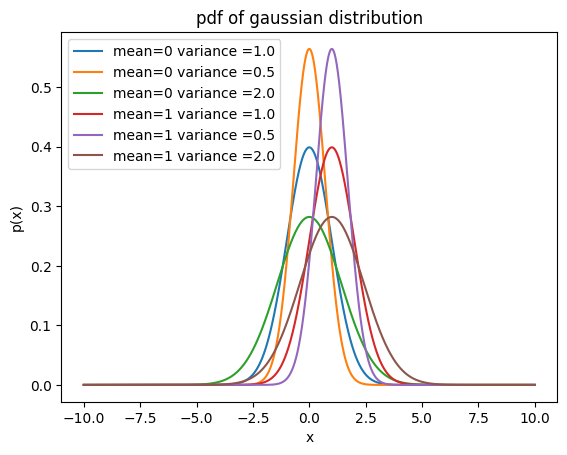

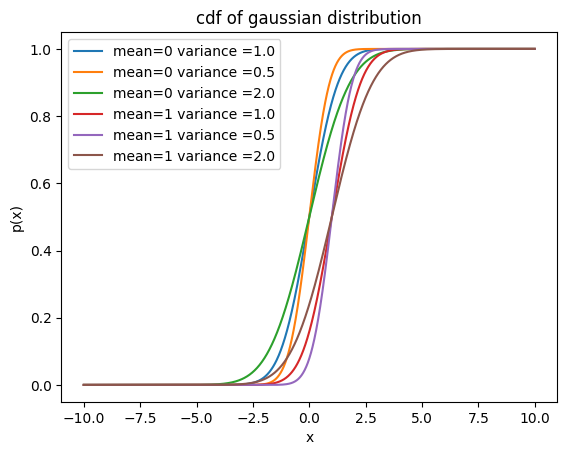

In [ ]:
def gaussian_pdf(x,mu,sigma2): #sigma2 is variance
  result=(x-mu)**2/(2*sigma2)
  result=np.exp(-result)
  result=result/np.sqrt(2*np.pi*sigma2)
  return result

#approximation of error function
def erf_appr(x):
  if x.all()==0:
    return 0
  elif x>0:
    p = 0.3275911
    a1 = 0.254829592
    a2 =-0.284496736
    a3 = 1.421413741
    a4 =-1.453152027
    a5 = 1.061405429
    t=1/(1+p*x)
    a=np.array([a1,a2,a3,a4,a5])
    summ=0
    for i in range(4,-1,-1):
      summ=a[i]+t*summ
    summ=summ*t
    summ=summ*np.exp(-x**2)
    return 1-summ
  elif x<0:
    return -erf_appr(-x)

def erf_appr_array(X): #x is an array
  result=np.zeros_like(X)
  for i in range(len(X)):
    x=X[i]
    result[i]=erf_appr(x)
  return result

def gaussian_cdf(x,mu,sigma2):
  x=(x-mu)/np.sqrt(2*sigma2)
  x=erf_appr(x)
  return 0.5*(1+x)
def gaussian_cdf_array(x,mu,sigma2):
  x=(x-mu)/np.sqrt(2*sigma2)
  x=erf_appr_array(x)
  return 0.5*(1+x)

Mu,Sigma2=np.array([0,1]),np.array([1,0.5,2])
x=np.linspace(-10,10,2000)
for mean in Mu:
  for var in Sigma2:
    y=gaussian_pdf(x,mean,var)
    plt.plot(x,y,label="mean="+str(mean)+" variance ="+str(var))
plt.legend()
plt.title("pdf of gaussian distribution")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

for mean in Mu:
  for var in Sigma2:
    y=gaussian_cdf_array(x,mean,var)
    plt.plot(x,y,label="mean="+str(mean)+" variance ="+str(var))
plt.legend()
plt.title("cdf of gaussian distribution")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()



### Exponential distribution
- Parameters : $\lambda>0$, rate.  
PDF: $P(x)=\lambda \exp{(-\lambda x)}, x\geq 0$.  
- CDF: $P(X\leq x)=\displaystyle \int_0^x P(t)dt=1-\exp(-\lambda x)$.  
- Mean: $\mathbb{E}[X]=\displaystyle \int_0^\infty tP(t)dt=\frac{1}{\lambda} \int_0^∞ t^{2-1}\exp(-t)dt=\frac{Γ(2)}{\lambda}=1/\lambda$.   
- Variance: $Var(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2=\displaystyle \int_0^\infty t^2P(t)dt-\frac{1}{\lambda^2}=\frac{1}{\lambda^2}\left( \int_0^∞ t^{3-1}\exp(-t)dt -1\right)=\frac{Γ(3)-1}{\lambda^2}=1/\lambda^2$



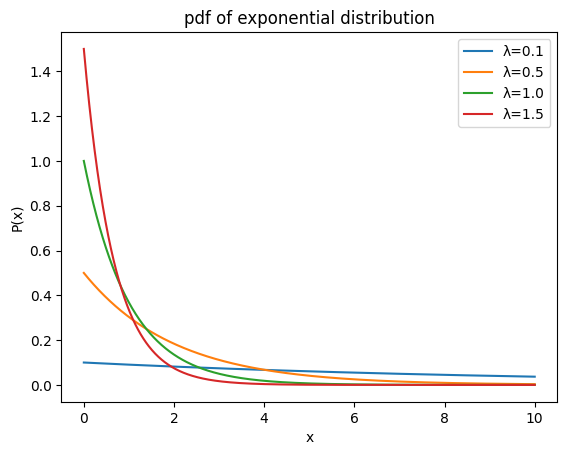

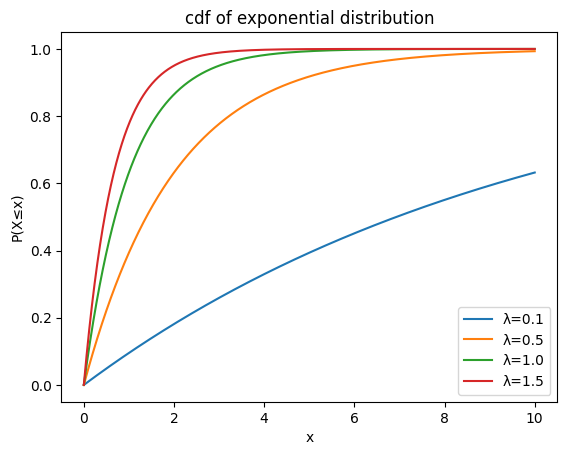

In [ ]:
def exponential_pdf(x,Lambda):
  return Lambda*np.exp(-Lambda*x)
def exponential_cdf(x,Lambda):
  return 1-np.exp(-Lambda*x)
Lambdas=np.array([0.1,0.5,1,1.5])
x=np.linspace(0,10,1000)
for Lambda in Lambdas:
  y=exponential_pdf(x,Lambda)

  plt.plot(x,y,label="λ="+str(Lambda))
  plt.legend()
plt.title("pdf of exponential distribution")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.show()
for Lambda in Lambdas:
  y=exponential_cdf(x,Lambda)

  plt.plot(x,y,label="λ="+str(Lambda))
  plt.legend()
plt.title("cdf of exponential distribution")
plt.xlabel("x")
plt.ylabel("P(X≤x)")
plt.show()

### Cauchy-Lorentz distribution
- Parameters : $x_0$ (location) and $\gamma>0$ (scale)
- PDF : $\displaystyle P(x)=\frac{1}{\pi γ}\frac{1}{1+\left(\frac{x-x_0}{γ} \right)^2}, x\in \mathbb{R}$.
- CDF : $\displaystyle P(X\leq x)=\frac{1}{\pi γ}\int_{-\infty}^x\frac{dt}{1+\left(\frac{t-x_0}{γ} \right)^2}=\frac{1}{\pi }\int_{-\infty}^{\frac{x-x_0}{γ} }\frac{du}{1+u^2}=\frac{1}{π}\arctan{(\frac{x-x_0}{γ})}+\frac{1}{2}$.
- Mean : $\displaystyle \mathbb{E}[X]=\int_{-∞}^\infty xP(x)dx=\frac{1}{\pi }\int_{-\infty}^∞\frac{x_0+\gamma u}{1+u^2}du$ which diverges. So mean is undefined.  
- Variance : similarly as in mean, variance is also
 undefined.


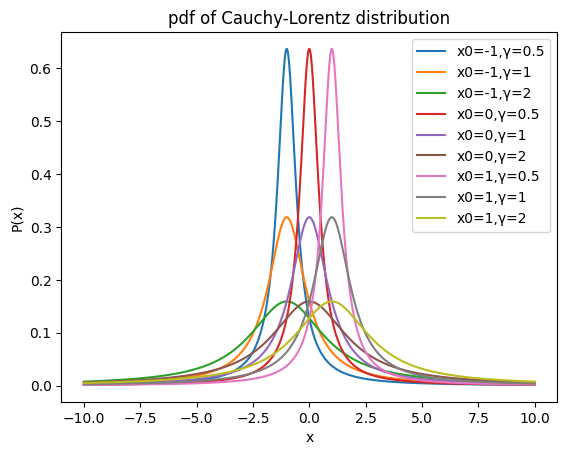

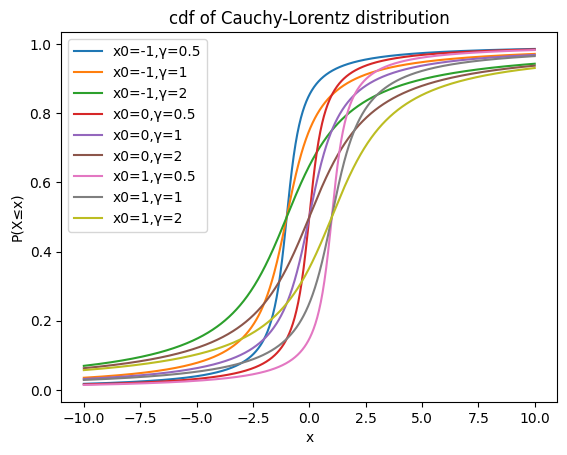

In [ ]:
def cauchy_pdf(x,x0,gamma):
  x=(x-x0)/gamma
  x=1+x**2
  x=1/x
  return (1/np.pi )*(1/gamma)*x
def cauchy_cdf(x,x0,gamma):
  x=(x-x0)/gamma
  x=np.arctan(x)
  return x/np.pi+0.5
X0=[-1,0,1]
Gamma=[0.5,1,2]
x=np.linspace(-10,10,1000)
for x0 in X0:
  for gamma in Gamma:
    y=cauchy_pdf(x,x0,gamma)
    plt.plot(x,y,label="x0="+str(x0)+",γ="+str(gamma))
plt.legend()
plt.title("pdf of Cauchy-Lorentz distribution")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.show()

for x0 in X0:
  for gamma in Gamma:
    y=cauchy_cdf(x,x0,gamma)
    plt.plot(x,y,label="x0="+str(x0)+",γ="+str(gamma))
plt.legend()
plt.title("cdf of Cauchy-Lorentz distribution")
plt.xlabel("x")
plt.ylabel("P(X≤x)")
plt.show()


### Continuous Uniform Distribution
- Parameters : $a < b \in \mathbb{R}$.
- PDF : $\displaystyle P(x)=\frac{1}{b-a}\chi_{[a,b]}(x)$, where $\chi_{[a,b]}(x)=0$ if $a\leq x\leq b$ and $0$ otherwise.
- CDF : $\displaystyle P(X\leq x)=\frac{1}{b-a}\int_{-\infty}^x χ_{[a,b]}(t)dt=\frac{x-a}{b-a}χ_{[a,b]}(x)+χ_{(b,\infty)}(x)$ .
- Mean : $\displaystyle \mathbb{E}[X]=\int_{-∞}^\infty xP(x)dx=\frac{1}{b-a }\int_{-\infty}^∞{xχ_{[a,b]}(x)dx}= \frac{1}{b-a }\int_{-}^b{xdx}=\frac{a+b}{2}$.
- Variance : $\displaystyle Var(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2=\int_{-∞}^\infty x^2P(x)dx-\frac{a^2+b^2+2ab}{4}=\frac{1}{b-a }\int_{a}^b{x^2dx}-\frac{a^2+b^2+2ab}{4}= \frac{a^2+b^2+ab}{3}-\frac{a^2+b^2+2ab}{4}=\frac{(a-b)^2}{12} $.

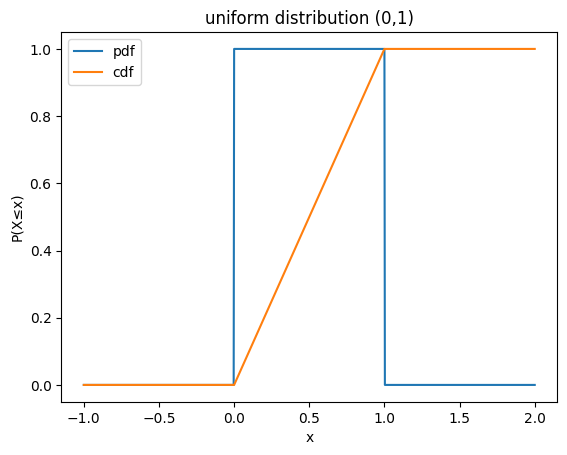

In [ ]:
def uniform_pdf(x,a,b): #a<b
  if x<a or x>b:
    return 0
  else:
    return 1/(b-a)

def uniform_cdf(x,a,b):
  if x<=a :
    return 0
  else:
    if x>=b:
      return 1
    else:
      return (x-a)/(b-a)

def uniform_array(x,a,b,arg):
  result=np.zeros_like(x)
  if arg=="pdf":
    for i in range(len(x)):
      result[i]=uniform_pdf(x[i],a,b)
  elif arg=="cdf":
    for i in range(len(x)):
      result[i]=uniform_cdf(x[i],a,b)
  return result

x=np.linspace(-1,2,1000)
y=uniform_array(x,0,1,"pdf")
z=uniform_array(x,0,1,"cdf")
plt.plot(x,y,label="pdf")
plt.plot(x,z,label="cdf")
plt.title("uniform distribution (0,1)")
plt.legend()
plt.xlabel("x")
plt.ylabel("P(X≤x)")
plt.show()


https://figures.semanticscholar.org/5ef79f1bf8e0d321139d9077c29cfd3c84c5bab7/2-Figure1-1.png


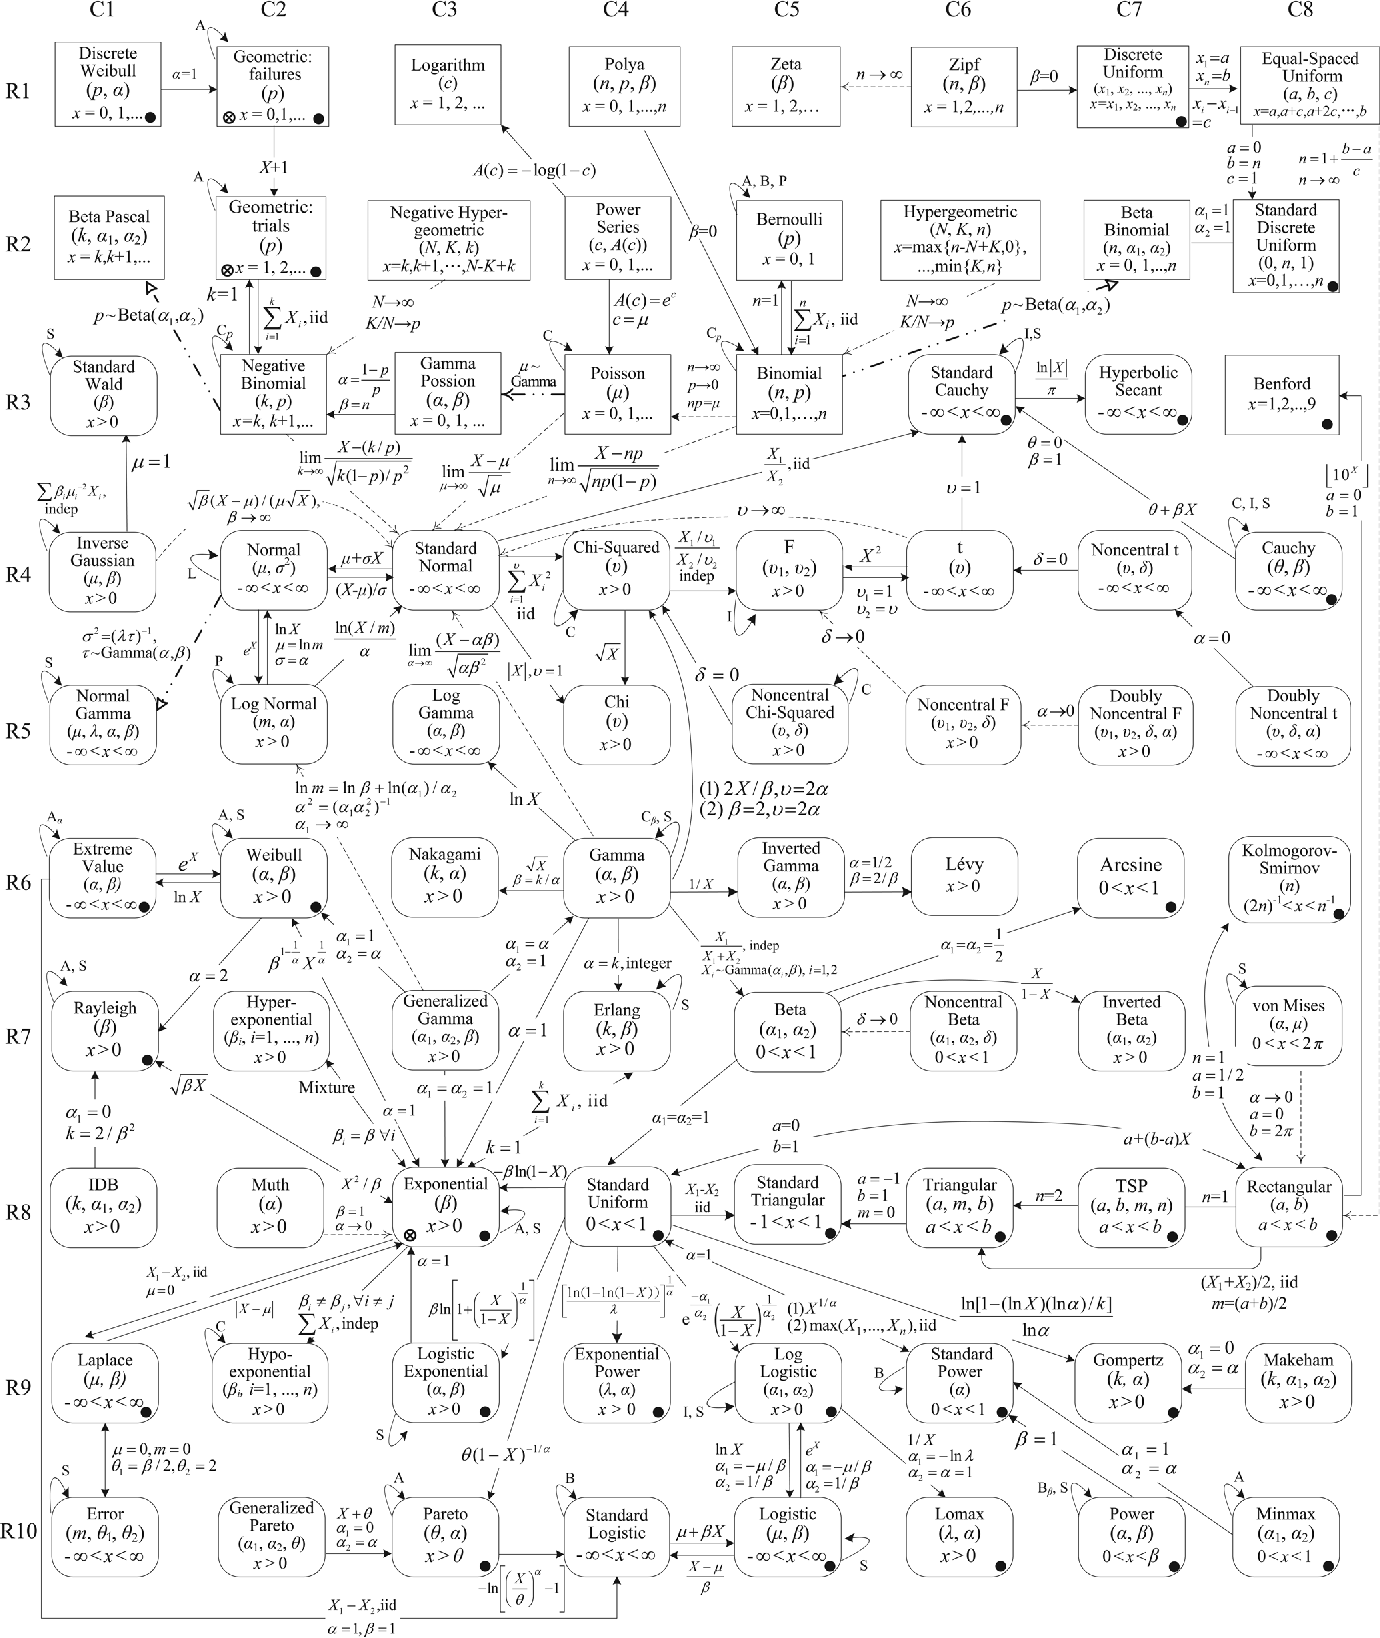